학습이란 훈련데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 의미

## 4.1.1 데이터 주도 학습  
데이터에서 답을 찾고 데이터에서 패턴을 발견하는 작업이 기계학습  
ex) 손글씨 숫자 5의 예:사람마다 고유의 필체가 있기 때문에 이미지에서 특징을 추출하고 특징 패턴을 기계학습 기술로 학습하는 방법=특징 추출  
특징:입력데이터에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변환기  
신경망은 모든 문제를 주어진 데이터 그대로 입력데이터로 활용해 엔드 투 엔드 방식으로 학습가능

## 4.1.2훈련데이터와 시험데이터  
데이터의 구성:훈련데이터(train dataset), 시험데이터(test dataset)  
범용능력을 고려해서 훈련데이터와 시험데이터로 나눠서 모델 성능을 평가한다.  
- 기계학습의 목표:범용능력(보지 못한 데이터로도 문제를 올바르게 풀어낼 수 있는 능력)  
cf) 이때 한 데이터셋(특히 훈련데이터셋)에 지나치게 최적화된 상태를 'over fitting(과적합)'이라고 한다.

## 4.2손실함수  
신경망은 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색한다.   
이때 지표로 손실함수를 사용. 손실함수는 일반적으로 오차제곱합, 교차 엔트로피 오차를 많이 사용

cf) 원핫인코딩:한 원소만 1 나머지는 0으로 나타내는 표기

In [1]:
import numpy as np

In [2]:
def sum_squares_error(y,t):
    return 0.5*np.sum((y-t)**2)#인수 y,t는 넘파이배열형태이다.

In [3]:
t=[0,0,1,0,0,0,0,0,0,0]
t

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [4]:
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
sum_squares_error(np.array(y),np.array(t))#오차범위

0.09750000000000003

In [5]:
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
sum_squares_error(np.array(y),np.array(t))#오차범위

0.5975

## 4.2.2 교차 엔트로피 오차  
yk가 신경망의 출력,tk가 정답 레이블일때 tk는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0인 원핫인코딩형태    
교차엔트로피 오차:정답일때의 출력이 전체값을 정하게 된다  
- 결과(오차값)이 더 작은 추정이 정답일 가능성이 높다

In [6]:
def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))#np.log함수에 0을 입력하면 -무한대가 되니까 그에 대한 방지조건으로 delta를 더함

In [7]:
t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [8]:
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))

2.302584092994546

## 4.2.3 미니배치 학습  
기계학습 문제는 훈련데이터에 대해 손실함수값을 구하고 그 값을 최대로 줄여주는 매개변수를 찾는다.  
일반적으로 훈련데이터로부터 일부만 골라 학습을 수행한다.  
- 미니배치 학습:수십~수백 정도의 배치사이즈로 잡고 학습 수행하는 방법

In [9]:
import sys,os
sys.path.append("C:\\Users\\a0103\\DeepLearning")

from mnist import load_mnist
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True,one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
train_size=x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size,batch_size)#훈련데이터에서 무작위로 10장만 추출하기
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]
#함수가 출력한 배열을 미니배치로 뽑아낼 데이터의 인덱스로 사용

## 4.2.4(배치용)교차 엔트로피 오차 구현하기  
가정)y는 신경망의 출력,t는 정답레이블

In [11]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size=y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

#미니배치크기로 나눠서 정규화하고 이미지1장당 평균교차엔트로피 오차 계산

In [12]:
#정답레이블이 숫자형태일때의 엔트로피 오차 함수
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size=y.shape[0]
    return -np.sum(np.log(y[np.range(batch_size),t]+1e-7))/batch_size
#np.range(batch_size)는 0~batch_size-1까지의 배열을 생성->각 데이터의 정답레이블에 해당하는 신경말의 출력을 추출한다.

## 4.2.5 왜 손실함수를 설정하는가?  
신경망 학습에서는 최적의 매개변수(가중치,편향)을 탐색할때 손실함수값을 최소화하는 매개변수값을 찾는다  
매개변수의 미분을 계산하고 그 값으로 매개변수 값을 다시 갱신하는 과정을 반복  
- 미분값이 음수면, 가중치 매개변수를 양의 방향으로 변화시켜 손실함수 값을 줄일 수 있다  
- 미분값이 양수면, 가중치 매개변수를 음의 방향으로 변화시켜 손실함수 값을 줄일 수 있다
- 미분값이 0이면 손실함수값은 더이상 줄어들지 않고 따라서 가중치 매개변수 갱신은 멈추게 된다.  

## 4.3.1 미분  

수치미분시 고려해야할 점:1.반올림 오차 문제 2.함수f의 차분

In [13]:
def numerical_diff(f,x):#중앙차분 or 중심차분
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

## 4.3.2 수치미분의 예

In [14]:
def function_1(x):
    return 0.01*x**2+0.1*x

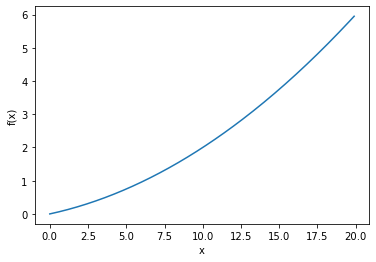

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0.0,20.0,0.1)
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [16]:
print(numerical_diff(function_1,5))#계산한 미분값이 f(x)의 변화량이다.
print(numerical_diff(function_1,10))

0.1999999999990898
0.2999999999986347


## 4.3.3 편미분  
편미분: 변수가 여러개인 함수에 대한 미분

In [17]:
def function_2(x):
    return x[0]**2+x[1]**2

In [18]:
def function_tmp1(x0):#x0=3,x1=4일때의 편미분 xo에 대한
    return x0*x0+4.0**2.0
numerical_diff(function_tmp1,3.0)

6.00000000000378

In [19]:
def function_tmp2(x1):#x1에 대한 편미분
    return 3.0*2.0+x1*x1
numerical_diff(function_tmp2,4.0)

7.999999999999119

## 4.4.1기울기
모든 변수의 편미분을 벡터로 정리한 것=기울기

In [20]:
def numerical_gradient(f,x):
    h=1e-4#0.0001
    grad=np.zeros_like(x)#x와 shape이 같은 배열 생성
    for idx in range(x.size):
        tmp_val=x[idx]
        #f(x+h)계산
        x[idx]=tmp_val+h
        fxh1=f(x)
        
        x[idx]=tmp_val-h
        fxh2=f(x)
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val#값 복원
    return grad

In [21]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [22]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([0., 4.])

In [23]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([6., 0.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


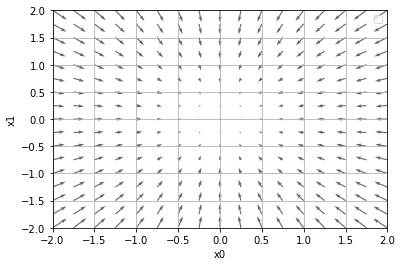

In [24]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

위 그림에서 기울기가 가리키는 쪽은 각 장소에서 함수의 출력값을 가장 크게 줄이는 방향이다. 기울기는 각 지점에서 낮아지는 방향을 가리킨다.

## 4.4.1경사하강법  
기울기를 이용해 함수의 최소값을 찾으려고 하는 경사법  
최적이란 손실함수가 최솟값일때의 매개변수값이다.  
경사법: 현위치에서 기울어진 방향으로 일정거리만큼 이동하고 또 다시 기울기 구하고 기울어진 방향으로 나아가는 걸 반복하면서 함수값 줄이는 방법

- 경사하강법: 최소값을 찾는 경우  
- 경사상승법: 최댓값을 찾는 경우  

In [25]:
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x)#x와 형상이 같고 원소값이 0인 배열 생성
    for idx in range(x.size):
        tmp_val=x[idx]
        #f(x+h)계산
        x[idx]=tmp_val+h
        fxh1=f(x)
        #f(x-h)계산
        x[idx]=tmp_val-h
        fxh2=f(x)
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val#값 복원
    return grad

cf)f:최적화하려는 함수  
init_x:초기값  
lr:learning rate  
step_num:경사법에 따른 반복횟수  
기울기를 numerical_gradient로 구하고 기울기에 학습률을 곱한 값으로 갱신하는 처리는 step_num번 반복

In [26]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x=x-lr*grad
    return x

In [27]:
def function_2(x):
    return x[0]**2+x[1]**2
init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [28]:
#학습률이 너무 클때:lr=10.0->큰 값으로 발산
init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=10.0,step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [29]:
init_x=np.array([-3.0,4.0])#학습률이 너무 작을 경우->거의 갱신되지 않음
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100)

array([-2.99999994,  3.99999992])

## 4.4.2 신경망에서의 기울기  
기울기:가중치 매개변수에 대한 손실함수의 기울기이다.  
W:가중치, L:손실함수  

In [30]:
import numpy as np
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

#x는 입력데이터,t는 정답레이블
class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3)#정규분포로 초기화
        
    def predict(self,x):#예측값
        return np.dot(x,self.W)
    
    def loss(self,x,t):#손실함수값
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y,t)
        return loss

In [31]:
net=simpleNet()
print(net.W)#가중치매개변수

[[-0.4377213   0.27132843 -0.16512767]
 [-0.5249683  -0.71633829 -0.86150478]]


In [32]:
x=np.array([0.6,0.9])
p=net.predict(x)
print(p)
np.argmax(p)

[-0.73510425 -0.48190741 -0.8744309 ]


1

In [33]:
t=np.array([0,0,1])#정답 레이블
net.loss(x,t)

1.289291097808081

In [34]:
def f(W):
    return net.loss(x,t)
dW=numerical_gradient(f,net.W)#net.W를 인수로 받아 손실함수를 계산하는 새로운 함수f를 만듦
print(dW)

[[ 0.18998882  0.24473159 -0.4347204 ]
 [ 0.28498323  0.36709738 -0.65208061]]


w11은 대략 0.19, w11을 h만큼 늘리면 손실함수는 0.19h만큼 증가. 손실함수를 줄이려면 '음의 방향' 으로 갱신해야 함.

w23은 대략 -0.65, w23을 h만큼 늘리면 손실함수는 0.65h만큼 감소. 손실함수를 줄이려면 '양의 방향' 으로 갱신해야 함.

파이썬에서는 간단한 함수는 lambda 기법을 쓰면 더 편리함

In [35]:
f=lambda w:net.loss(x,t)
dW=numerical_gradient(f,net.W)
print(dW)

[[ 0.18998882  0.24473159 -0.4347204 ]
 [ 0.28498323  0.36709738 -0.65208061]]


## 4.5.1 2층 신경망 클래스 구현하기 및 학습 알고리즘 구현하기

학습: 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정

1단계 - 미니배치 : 훈련 데이터 중 일부를 무작위로 가져옴. 손실 함수 값을 줄이는 것이 목표.

2단계 - 기울기 산출 : 각 가중치 매개변수의 기울기를 구함. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시

3단계 - 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신

4단계 - 반복 : 1~3단계를 반복

확률적 경사 하강법(stochastic gradient descent, SGD) : 미니배치로 무작위로 선택하여 골라낸 데이터로 경사하강하는 법  
즉 한번에 하나의 샘플에 대해 그레이디언트를 계산하고 즉시 매개변수를 갱신하는 방식

In [36]:
import numpy as np
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)
        return grads

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_diff(x):
    return sigmoid(x) * (1 - sigmoid(x))

def 시그모이드_접선(x): # 접선 ax+b에서 a,b 값을 리턴
    return sigmoid_diff(x), sigmoid(x) - sigmoid_diff(x) * x

params:신경망의 매개변수를 보관하는 딕셔너리 변수(인스턴스변수)  
이때,params['W1']은 1번째 은닉층의 가중치,params['b1']은 1번째 은닉층의 편향  
이때,params['W2']는 2번째 은닉층의 가중치,params['b2']는 2번째 은닉층의 편향  
***
grads:기울기 보관하는 딕셔너리 변수  
grads['W1']은 1번째 은닉층의 가중치 기울기,grads['b1']은 1번째 은닉층의 편향 기울기  
grads['W2']은 2번째 은닉층의 가중치 기울기,grads['b2']는 2번째 은닉층의 편향 기울기  

### TwoLayerNet메소드들  
__init__:초기화 수행  
predict(self,x): 예측 수행(인수는 이미지데이터)  
loss(self.x,t): 손실함수 값을 구함(인수는 이미지데이터,정답레이블이다)  
accuracy(self.x,t): 정확도  
numerical_gradient(self.x,t): 가중치 매개변수의 기울기 구하기  
gradient(self.x,t): 가중치 매개변수의 기울기를 구한다.  

In [38]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) 
print(net.params['b1'].shape) 
print(net.params['W2'].shape) 
print(net.params['b2'].shape) 

(784, 100)
(100,)
(100, 10)
(10,)


In [39]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)

In [41]:
x=np.random.rand(100,784)
t=np.random.rand(100,10)
grads=net.numerical_gradient(x,t)#기울기 계산-grads변수에는 params변수에 대응하는 각 매개변수 기울기가 저장된다.
grads['W1'].shape
grads['b1'].shape
grads['W2'].shape
grads['b2'].shape

(10,)

## 4.5.2 미니배치 학습 구현하기

In [43]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1#학습률

# 1에포크당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask=np.random.choice(train_size,batch_size)#샘플에서 미니배치batchsize만큼 랜덤으로 추출하기
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]
    
    # 기울기 계산하는 부분
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad=network.gradient(x_batch,t_batch)
    
    # 매개변수 갱신(경사하강법 쓰면서)
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산->시간이 오래걸리고 자주 기록할 필요도 없기 때문에 1에포크마다 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.7794166666666666, 0.7857
train acc, test acc | 0.8777333333333334, 0.8807
train acc, test acc | 0.9009833333333334, 0.904
train acc, test acc | 0.90925, 0.9106
train acc, test acc | 0.91535, 0.9181
train acc, test acc | 0.9211833333333334, 0.9236
train acc, test acc | 0.9253, 0.9257
train acc, test acc | 0.9285, 0.9278
train acc, test acc | 0.93125, 0.9311
train acc, test acc | 0.93335, 0.9339
train acc, test acc | 0.9360333333333334, 0.9372
train acc, test acc | 0.9390833333333334, 0.9387
train acc, test acc | 0.9414666666666667, 0.9417
train acc, test acc | 0.9439666666666666, 0.9424
train acc, test acc | 0.9455333333333333, 0.9438
train acc, test acc | 0.94685, 0.9454


(0.0, 3.0)

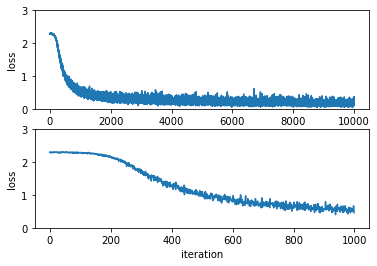

In [44]:
# 그림 4-11 손실 함수의 추이: 위쪽은 10,000회 반복까지의 추이, 아래쪽은 1,000회 반복까지의 추이
f, (ax1, ax2) = plt.subplots(2, 1)
x = np.array(range(iters_num))
ax1.plot(x, train_loss_list, label='loss')
ax1.set_xlabel("iteration")
ax1.set_ylabel("loss")
ax1.set_ylim(0, 3.0)
ax2.plot(x[:1000], train_loss_list[:1000], label='loss')
ax2.set_xlabel("iteration")
ax2.set_ylabel("loss")
ax2.set_ylim(0, 3.0)

## 4.5.3 시험데이터로 평가하기  
손실함수의 값:훈련데이터의 미니배치에 대한 손실함수 값이다.  
훈련데이터의 손실함수값이 작아지는 것은 신경망이 잘 학습하고 있다는 의미다  
But,과적합문제를 일으키지 않는지 확인해야함  
따라서 정확도를 평가함  

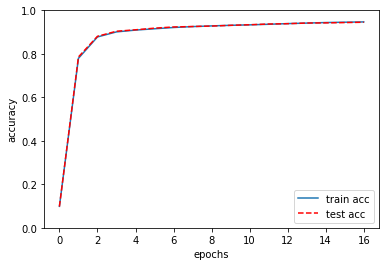

In [45]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--',color='red')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()#이 경우 오버피팅이 일어나지 않았음->모델이 성공적인 편